<a href="https://colab.research.google.com/github/ngohuy1811/AIO-Module-4/blob/main/Insight_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 66.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 12.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [ ]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [ ]:
#Them bias vao X
intercept = np.ones((X.shape[0] , 1))

X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
#Chia tap train, val, test:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
    X_b , y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train , y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
#Chuan hoa du lieu:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])



In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta ):
    dot_product =np.dot(X,theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat ,y):
    y_hat = np.clip(
        y_hat , 1e-7 , 1- 1e-7
    )

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat-y))/y.size

def update_theta(theta , gradient , lr):
    return theta - lr * gradient

def compute_accuracy( X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc




In [ ]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape [1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range (0,X_train.shape[0], batch_size):
        X_i = X_train [i:i+ batch_size]
        y_i = y_train [i:i+ batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i,y_i,y_hat)

        theta = update_theta(theta,gradient,lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val,theta)
        val_loss = compute_loss( y_val_hat , y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss: { val_batch_loss :.3f}')



EPOCH 1:	Training loss : 0.670	Validation loss: 0.582

EPOCH 2:	Training loss : 0.640	Validation loss: 0.567

EPOCH 3:	Training loss : 0.614	Validation loss: 0.555

EPOCH 4:	Training loss : 0.592	Validation loss: 0.544

EPOCH 5:	Training loss : 0.572	Validation loss: 0.535

EPOCH 6:	Training loss : 0.554	Validation loss: 0.528

EPOCH 7:	Training loss : 0.539	Validation loss: 0.522

EPOCH 8:	Training loss : 0.526	Validation loss: 0.517

EPOCH 9:	Training loss : 0.514	Validation loss: 0.513

EPOCH 10:	Training loss : 0.504	Validation loss: 0.509

EPOCH 11:	Training loss : 0.495	Validation loss: 0.507

EPOCH 12:	Training loss : 0.487	Validation loss: 0.505

EPOCH 13:	Training loss : 0.480	Validation loss: 0.503

EPOCH 14:	Training loss : 0.474	Validation loss: 0.502

EPOCH 15:	Training loss : 0.468	Validation loss: 0.501

EPOCH 16:	Training loss : 0.463	Validation loss: 0.500

EPOCH 17:	Training loss : 0.459	Validation loss: 0.500

EPOCH 18:	Training loss : 0.455	Validation loss: 0.500



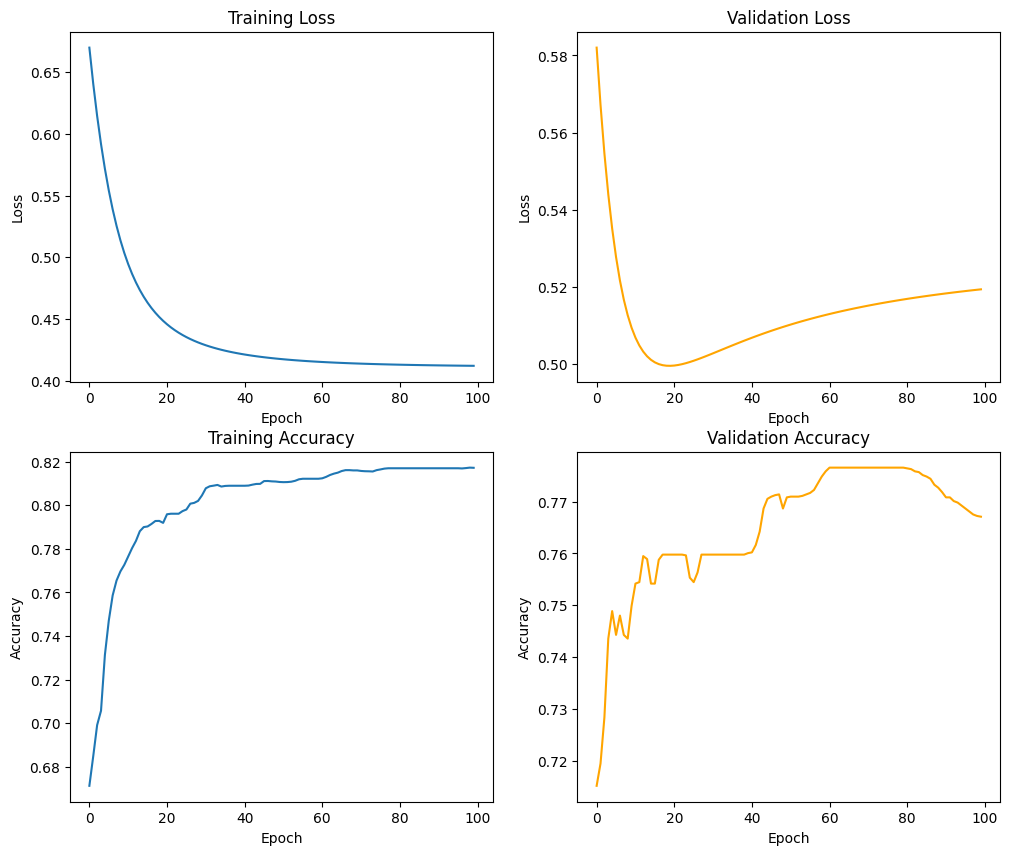

In [ ]:
fig , ax = plt.subplots(2, 2, figsize =(12 , 10))
ax[0 , 0].plot(train_losses)
ax[0 , 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0].set_title('Training Loss')

ax[0 , 1].plot(val_losses, 'orange')
ax[0 , 1].set(xlabel='Epoch', ylabel='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
#danh gia mo hinh:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc }')
print(f'Accuracy : {test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045


#**Twitter Sentiment Analysis**

In [ ]:
#Thu vien
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib . pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
#Doc du lieu:

dataset_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col ='id')
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [ ]:
#Chuan hoa van ban dau vao
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT [\s]+', '',text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\ r\n]*','',text)

    # Hashtags removal
    text = re.sub(r'#','',text)

    # Punctuation removal
    text = re.sub (r'[^\ w\s]','', text )

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case =False,
        strip_handles =True,
        reduce_len = True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens


In [ ]:
# Bo luu gi tan suat xuat hien cua cac tu:
def get_freqs(df):
    #   Khai báo một defaultdict (defaultdict khác với dict thông thường ở
    #   điểm defaultdict tự động gán giá trị mặc định cho các key mới, ở đây ta gán
    #   bằng 0).
    freqs = defaultdict(lambda:0)

    #   Duyệt qua từng dòng tweet và label tương ứng:
    for idx , row in df.iterrows():
        tweet = row ['tweet']
        label = row ['label']

    #   Chuẩn hóa dòng tweet hiện tại.
        tokens = text_normalize(tweet)

    #   Duyệt qua từng từ (token) trong tweet hiện tại, khai báo key
    #   có dạng tuple (token, label) và tăng giá trị của key lên 1.
        for token in tokens:
            pair = (token,label)
            freqs[ pair ] += 1

    return freqs

In [ ]:
# Xây dựng hàm tạo vector đặc trưng:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    #   Tạo một vector biểu diễn văn bản giá trị 0 có 3 phần tử, đại diện
    #   cho (intercept, n_positives, n_negatives)
    X = np.zeros(3)

    #   Gán phần tử đầu tiên giá trị 1 (intercept).
    X[0] = 1
    #   Duyệt qua từng từ trong văn bản đầu vào, lấy giá trị tần suất
    #   của từ ứng với từng label và cộng dồn vào vị trí phần tử trong vector biểu
    #   diễn tương ứng.
    for token in tokens :
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X




In [ ]:
#   Trích xuất đặc trưng toàn bộ dữ liệu:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet,freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
#   Chia bộ train, val, test:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train , y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
#Chuan hoa du lieu:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict(X, theta ):
    dot_product =np.dot(X,theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat ,y):
    y_hat = np.clip(
        y_hat , 1e-7 , 1- 1e-7
    )

    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat-y))/y.size

def update_theta(theta , gradient , lr):
    return theta - lr * gradient

def compute_accuracy( X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc


In [ ]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape [1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range (0,X_train.shape[0], batch_size):
        X_i = X_train [i:i+ batch_size]
        y_i = y_train [i:i+ batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i,y_i,y_hat)

        theta = update_theta(theta,gradient,lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val,theta)
        val_loss = compute_loss( y_val_hat , y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH {epoch + 1}:\tTraining loss : {train_batch_loss:.3f}\tValidation loss: { val_batch_loss :.3f}')


EPOCH 1:	Training loss : 0.824	Validation loss: 0.825

EPOCH 2:	Training loss : 0.773	Validation loss: 0.774

EPOCH 3:	Training loss : 0.733	Validation loss: 0.733

EPOCH 4:	Training loss : 0.700	Validation loss: 0.700

EPOCH 5:	Training loss : 0.674	Validation loss: 0.674

EPOCH 6:	Training loss : 0.654	Validation loss: 0.654

EPOCH 7:	Training loss : 0.638	Validation loss: 0.638

EPOCH 8:	Training loss : 0.625	Validation loss: 0.625

EPOCH 9:	Training loss : 0.614	Validation loss: 0.615

EPOCH 10:	Training loss : 0.606	Validation loss: 0.607

EPOCH 11:	Training loss : 0.600	Validation loss: 0.601

EPOCH 12:	Training loss : 0.594	Validation loss: 0.596

EPOCH 13:	Training loss : 0.590	Validation loss: 0.592

EPOCH 14:	Training loss : 0.587	Validation loss: 0.588

EPOCH 15:	Training loss : 0.584	Validation loss: 0.585

EPOCH 16:	Training loss : 0.581	Validation loss: 0.583

EPOCH 17:	Training loss : 0.579	Validation loss: 0.581

EPOCH 18:	Training loss : 0.578	Validation loss: 0.580



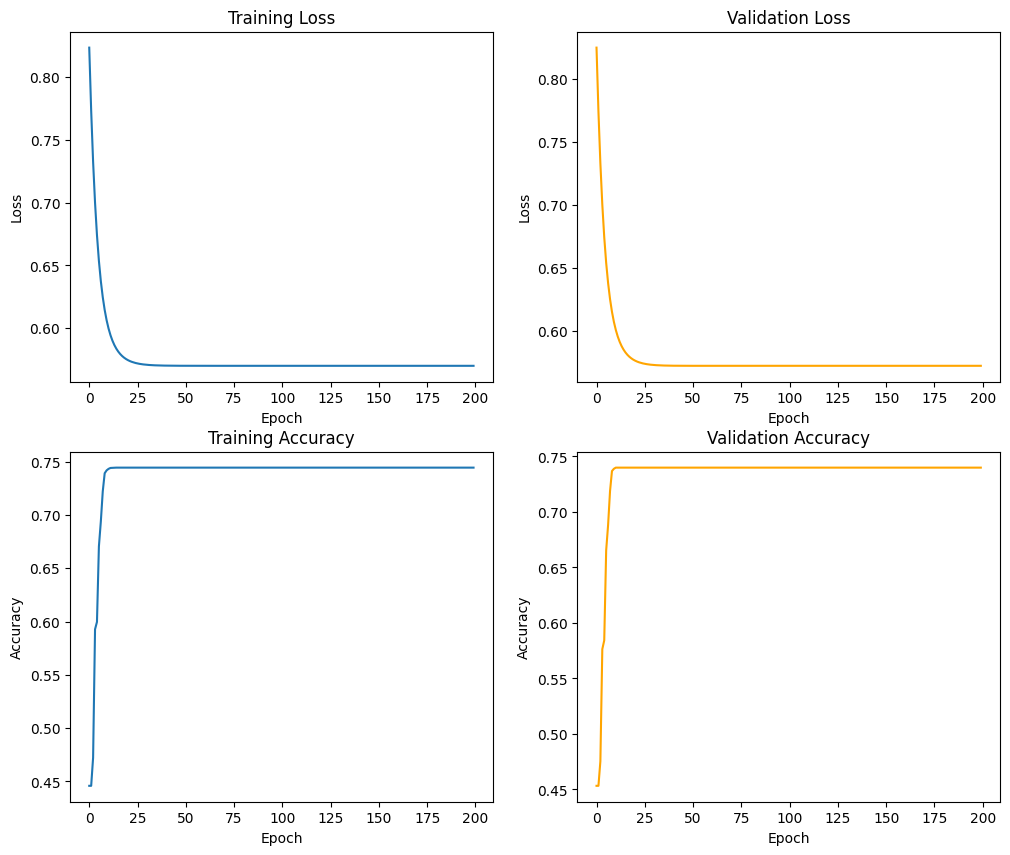

In [ ]:
fig , ax = plt.subplots(2, 2, figsize =(12 , 10))
ax[0 , 0].plot(train_losses)
ax[0 , 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0].set_title('Training Loss')

ax[0 , 1].plot(val_losses, 'orange')
ax[0 , 1].set(xlabel='Epoch', ylabel='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
#danh gia mo hinh:
val_set_acc = compute_accuracy(X_val,y_val,theta)
test_set_acc = compute_accuracy(X_test,y_test,theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc }')
print(f'Accuracy : {test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.73989898989899
Accuracy : 0.7512626262626263


In [2]:
import numpy as np

In [9]:
def predict(X, theta):
    z = np.dot(X, theta)
    predict = 1 / (1 + np.exp(-z))
    return predict


X = [[22.3, -1.5, 1.1, 1]]
theta = [0.1, -0.15, 0.3, -0.2]
print(f'Predicted value: {predict(X, theta)}')

Predicted value: [0.92988994]


In [11]:
def compute_loss(y_hat ,y):
    y_hat = np.clip(
        y_hat , 1e-7 , 1- 1e-7
    )
    loss = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return np.round(loss,3)

y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3,0.95])
print(f'Loss: {compute_loss(y_hat, y)}')

Loss: 0.504


In [16]:
def compute_gradient(X,y_true,y_pred):
    X = np.array(X)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    gradient = np.dot(X.T, (y_pred-y_true))/y_true.size
    return gradient

X = [[1, 2],[2, 1],[1,1],[2, 2]]
y_true = [0, 1, 0, 1]
y_pred = [0.25, 0.75,0.4, 0.8]
print(f'Gradient: {compute_gradient(X, y_true, y_pred)}')

Gradient: [-0.0625  0.0625]


In [17]:
def compute_accuracy(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    acc = np.mean(y_true == y_pred_rounded)
    return acc

y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]
print(f'Accuracy: {compute_accuracy(y_true, y_pred)}')

Accuracy: 1.0


In [18]:
def compute_gradient(X, y_true , y_pred ):
    X = np.array(X)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    gradient = np.dot(X.T, ( y_pred - y_true ))/y_true.size
    return gradient

X = [[1, 3], [2, 1], [3, 2], [1, 2]]
y_true = [1, 0, 1, 1]
y_pred = [0.7, 0.4, 0.6, 0.85]
print(f'Gradient: {compute_gradient(X, y_true, y_pred)}')


Gradient: [-0.2125 -0.4   ]
